In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
df = pd.read_csv("../data/processed/cleaned_retail_sales.csv")
df.head()


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
total_revenue = df["total_amount"].sum()
total_revenue


np.int64(456000)

In [4]:
f"Total Revenue: {total_revenue:,}"


'Total Revenue: 456,000'

In [5]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")

monthly_sales = (
    df.groupby("month")["total_amount"]
      .sum()
      .reset_index()
)

monthly_sales


,month,total_amount
0,2023-01,35450
1,2023-02,44060
2,2023-03,28990
3,2023-04,33870
4,2023-05,53150
5,2023-06,36715
6,2023-07,35465
7,2023-08,36960
8,2023-09,23620
9,2023-10,46580


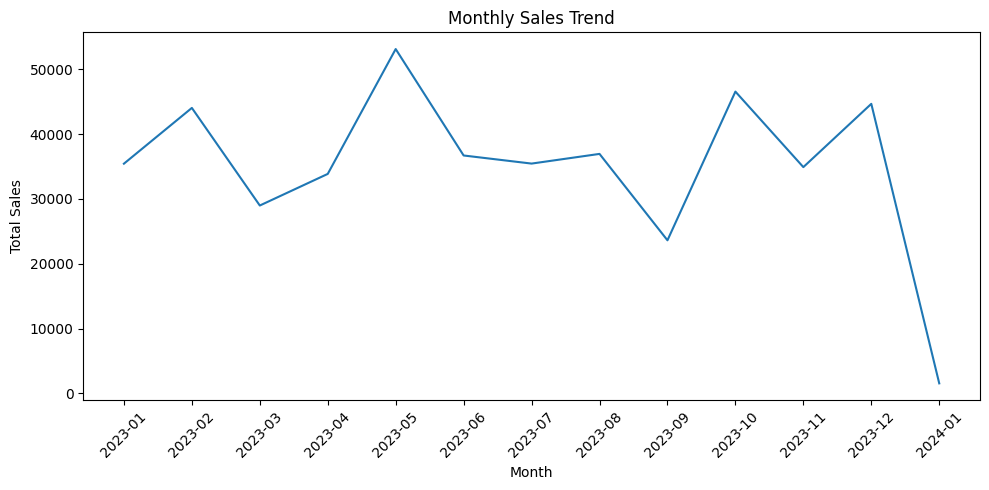

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["month"].astype(str),
         monthly_sales["total_amount"])
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()

plt.savefig("../outputs/figures/monthly_sales_trend.png")
plt.show()


In [7]:
category_sales = (
    df.groupby("product_category")["total_amount"]
      .sum()
      .sort_values(ascending=False)
)

category_sales


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64

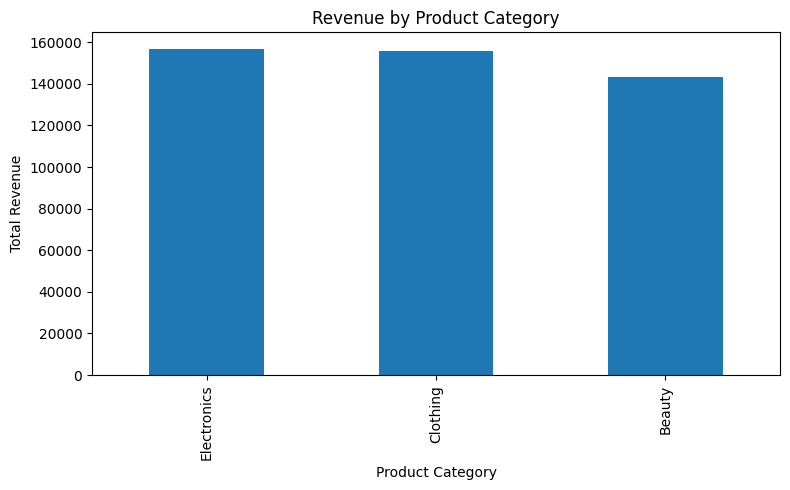

In [8]:
plt.figure(figsize=(8, 5))
category_sales.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("../outputs/figures/revenue_by_category.png")
plt.show()


## Key Insights

Highest revenue category

Seasonal trends 

Revenue concentration